# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

Датасет train содержит пропущенные значения, количество фич - 85, целевых признаков - 2, всего объектов 16860

In [5]:
test = pd.read_csv('/datasets/gold_recovery_test.csv')
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

Тестовый датасет содержит пропущенные значения. Более того, перед нами представлены не все фичи. Всего 53 фичи и 5856 объектов.

In [7]:
data = pd.read_csv('/datasets/gold_recovery_full.csv')
data

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Датасет содержит данные о 22716 объектах (как раз train + test = 22716)

Для вычисления recovery будем пользоваться столбцами 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au'. Но данные фичи содержат пропущенные значения, посмотрим на количество

In [9]:
print(train['rougher.output.concentrate_au'].isna().sum(),
     train['rougher.input.feed_au'].isna().sum(),
     train['rougher.output.tail_au'].isna().sum())

82 83 2249


Посмотрим, есть ли пропущенные значения в каждом из трех столбцов

In [10]:
train[train['rougher.output.concentrate_au'].isna() == True].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
746,2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
train[train['rougher.output.concentrate_au'].isna() == True].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
746,2016-02-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,2016-03-09 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Некоторые объекты содержат большое количество NaN значений.

Датасет содержит информацию о времени (столбец date), и многие "соседние" показатели сильно похожи друг на друга, поэтому значения фичей, содержащие Nan'ы заменим используя ffil (метод заменяет Nan предыдущим значением по данному столбцу), а пропущенные значения в целевых признаках дропнем

In [12]:
train[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

rougher.output.recovery    2573
final.output.recovery      1521
dtype: int64

In [13]:
train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [14]:
train[['rougher.output.recovery', 'final.output.recovery']].isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [15]:
train.fillna(method='ffill', inplace=True)

print(train['rougher.output.concentrate_au'].isna().sum(),
     train['rougher.input.feed_au'].isna().sum(),
     train['rougher.output.tail_au'].isna().sum())

0 0 0


Посмотрим итоговые размеры датасета

In [16]:
train.shape

(14149, 87)

Просчитаем recovery

In [17]:
recovery_au = (train['rougher.output.concentrate_au'] * (
    train['rougher.input.feed_au'] - train['rougher.output.tail_au'])) * 100 / (
    train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))


In [18]:
mean_absolute_error(train['rougher.output.recovery'], recovery_au)

1.0934123538501412e-14

Отклонение маленькое, следовательно recovery подсчитано верно

Узнаем, какие столбцы не указаны в датасете test. Для этого воспользуемся особенностью переменных типа set.

In [19]:
test_col = set(test.columns)
len(test_col)

53

In [20]:
data_col = set(data.columns)
len(data_col)

87

In [21]:
missed = data_col - (test_col & data_col)
missed

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [22]:
len(missed)

34

Как можем заметить, недоступны только данные, получаемые после определенного этапа, т.е output-фичи, а также некоторые calculation-параметры, которые, вероятно, нужны для получения тех самых output

Для построения модели понадобятся исходные input-фичи, а также параметр state с помощью которых уже и будем предсказывать recovery для rougher и final этапов.

Выделим из общего датасета фичи, которые указаны в датасете для обучения, а также добавим в новый датасет целевые признаки и удалим столбец date

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant             

In [24]:
train = train[test.columns]
train.set_index('date', inplace=True)
data.set_index('date', inplace=True)
test.set_index('date', inplace=True)

In [25]:
train['rougher.output.recovery'] = data.loc[train.index, :]['rougher.output.recovery']
train['final.output.recovery'] = data.loc[train.index, :]['final.output.recovery']
train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,

In [26]:
test['final.output.recovery'] = data.loc[test.index, :]['final.output.recovery']
test['rougher.output.recovery'] = data.loc[test.index, :]['rougher.output.recovery']
test.isna().sum()

primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257
rougher.input.floatbank10_xanthate            123


Избавимся от пропущенных значений в датасете test

In [27]:
test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
test.fillna(method='ffill', inplace=True)

In [28]:
test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

Разметим данные на фичи и таргеты

In [29]:
feature_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

feature_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

print(feature_train.shape, target_train.shape)
print(feature_test.shape, target_test.shape)

(14149, 52) (14149, 2)
(5290, 52) (5290, 2)


<div class="alert alert-block alert-danger">

~~Выборка уже была изначально поделена на обучающую и тестовую, те данные и следует использовать.~~
</div>

По условию задачи целевых признака два. Выделим их

In [30]:
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']

target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']
print(target_train_rougher.shape, target_train_final.shape)
print(target_test_rougher.shape, target_test_final.shape)

(14149,) (14149,)
(5290,) (5290,)


Из полного датасета удалим пропущенные значения в целевыз признаках, а в остальных воспользуемся методом ffill

In [31]:
data = data.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).fillna(method='ffill')

## Вывод

В результате предобработки данных:
- выделили фичи для обучения
- избавились от пропущенных значений
- разбили датасет на две выборки
- выделили целевые признаки

# 2. Анализ данных

Посмотрим как менялась концентрация вещества на различных этапах отчистки

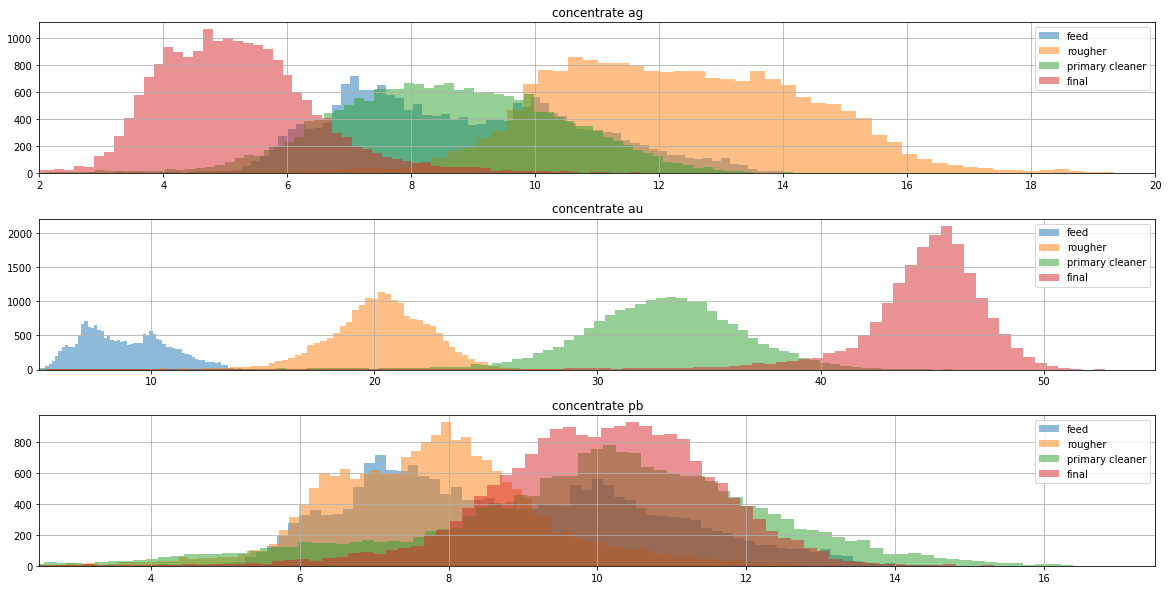

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.hist(data['rougher.input.feed_ag'].dropna(), bins=100, alpha=0.5)
plt.hist(data['rougher.output.concentrate_ag'].dropna(), bins=100, alpha=0.5)
plt.hist(data['primary_cleaner.output.concentrate_ag'].dropna(), bins=100, alpha=0.5)
plt.hist(data['final.output.concentrate_ag'].dropna(), bins=100, alpha=0.5)
plt.legend(['feed', 'rougher', 'primary cleaner', 'final'])
plt.title('concentrate ag')
plt.grid()
plt.xlim(2, 20)

plt.subplot(312)
plt.hist(data['rougher.input.feed_ag'].dropna(), bins=100, alpha=0.5)
plt.hist(data['rougher.output.concentrate_au'].dropna(), bins=100, alpha=0.5)
plt.hist(data['primary_cleaner.output.concentrate_au'].dropna(), bins=100, alpha=0.5)
plt.hist(data['final.output.concentrate_au'].dropna(), bins=100, alpha=0.5)
plt.legend(['feed', 'rougher', 'primary cleaner', 'final'])
plt.title('concentrate au')
plt.grid()
plt.xlim(5,55)

plt.subplot(313)
plt.hist(data['rougher.input.feed_ag'].dropna(), bins=100, alpha=0.5)
plt.hist(data['rougher.output.concentrate_pb'].dropna(), bins=100, alpha=0.5)
plt.hist(data['primary_cleaner.output.concentrate_pb'].dropna(), bins=100, alpha=0.5)
plt.hist(data['final.output.concentrate_pb'].dropna(), bins=100, alpha=0.5)
plt.legend(['feed', 'rougher', 'primary cleaner', 'final'])
plt.title('concentrate pb')
plt.grid()
plt.xlim(2.5, 17.5)

plt.subplots_adjust(hspace=0.3)
plt.show()

Как можем видеть из графиков, в результате технологического процесса: 
- количество концентрата серебра (ag) уменьшилось: гистограмма описывающая feed расположилась правее относительно final
- золота (au) стало больше: значение final выросло приблизительно в пять раз, относительно feed
- изначальное распределение свинца (feed) имеет два локальных максимума

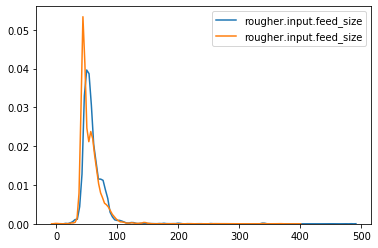

In [33]:
sns.kdeplot(feature_train['rougher.input.feed_size'], legend='train feed size')
sns.kdeplot(feature_test['rougher.input.feed_size'], legend='test feed size')

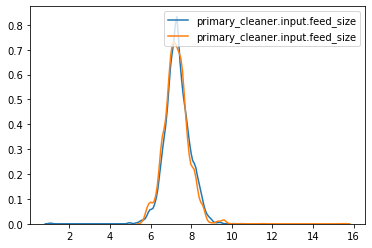

In [34]:
sns.kdeplot(feature_train['primary_cleaner.input.feed_size'])
sns.kdeplot(feature_test['primary_cleaner.input.feed_size'])

Как можем видеть, графики сильно похожи друг на друга, вероятно, что модель, обученная на тренировочных данных, хорошо предскажет и тестовые данные

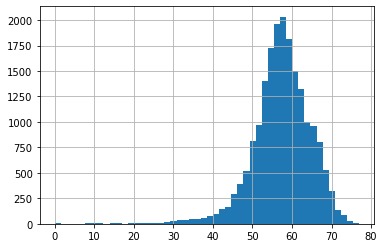

In [35]:
plt.hist((pd.Series(data['rougher.input.feed_au'] + 
                    data['rougher.input.feed_ag'] + 
                    data['rougher.input.feed_pb'] + 
                    data['rougher.input.feed_sol'])), bins=50)
plt.grid()
plt.show()

In [36]:
(data['rougher.input.feed_au'] + data['rougher.input.feed_ag']
 + data['rougher.input.feed_pb'] + data['rougher.input.feed_sol']).sort_values().head(20)

date
2018-03-12 04:59:59     0.040000
2018-03-12 05:59:59     0.040000
2018-03-12 03:59:59     0.040000
2018-03-12 06:59:59     0.040000
2018-03-12 02:59:59     0.040000
2016-09-02 06:59:59     4.501868
2017-11-04 23:59:59     8.072476
2018-03-15 16:59:59     8.217984
2016-03-13 12:00:00     8.219283
2016-04-21 00:00:00     8.429133
2017-08-13 17:59:59     9.468028
2018-05-15 04:59:59     9.514401
2018-03-12 01:59:59    10.209166
2016-11-01 11:59:59    10.936233
2018-07-15 20:59:59    11.784499
2018-02-21 01:59:59    12.181885
2017-03-03 22:59:59    12.761538
2017-12-16 05:59:59    13.976035
2018-03-16 20:59:59    14.969067
2016-08-26 09:59:59    15.036842
dtype: float64

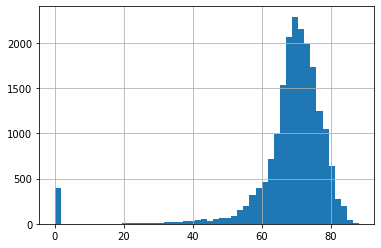

In [37]:
plt.hist(pd.Series(data['rougher.output.concentrate_au'] + 
                   data['rougher.output.concentrate_ag'] + 
                   data['rougher.output.concentrate_pb'] + 
                   data['rougher.output.concentrate_sol']), bins=50)
plt.grid()
plt.show()

In [38]:
(data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_ag']
 + data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol']).sort_values().head(500)

date
2017-12-06 22:59:59     0.000000
2017-06-05 13:59:59     0.000000
2017-06-05 12:59:59     0.000000
2017-10-23 01:59:59     0.000000
2017-10-23 07:59:59     0.000000
2017-10-23 08:59:59     0.000000
2017-10-23 09:59:59     0.000000
2017-06-05 11:59:59     0.000000
2017-03-07 23:59:59     0.000000
2017-06-05 10:59:59     0.000000
2017-06-05 09:59:59     0.000000
2017-06-05 08:59:59     0.000000
2017-06-05 07:59:59     0.000000
2017-06-05 06:59:59     0.000000
2017-11-19 17:59:59     0.000000
2017-11-19 18:59:59     0.000000
2017-03-09 05:59:59     0.000000
2017-11-19 19:59:59     0.000000
2017-11-19 20:59:59     0.000000
2017-11-19 21:59:59     0.000000
2017-11-19 22:59:59     0.000000
2017-12-06 17:59:59     0.000000
2017-10-22 19:59:59     0.000000
2017-06-05 05:59:59     0.000000
2017-10-22 09:59:59     0.000000
2017-06-05 15:59:59     0.000000
2017-08-14 01:59:59     0.000000
2017-08-14 02:59:59     0.000000
2017-06-06 01:59:59     0.000000
2017-08-18 08:59:59     0.000000
2017-

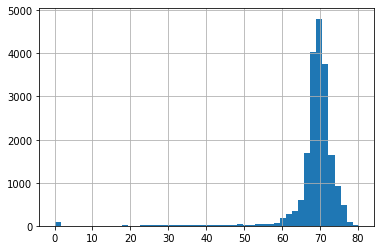

In [39]:
plt.hist(pd.Series(data['final.output.concentrate_au'] +  
                   data['final.output.concentrate_ag'] + 
                   data['final.output.concentrate_pb'] + 
                   data['final.output.concentrate_sol']), bins=50)
plt.grid()
plt.show()

In [40]:
(data['final.output.concentrate_au'] + data['final.output.concentrate_ag']
 + data['final.output.concentrate_pb'] + data['final.output.concentrate_sol']).sort_values().head(300)

date
2017-12-16 23:59:59     0.000000
2017-03-06 20:59:59     0.000000
2017-11-30 02:59:59     0.000000
2016-02-13 11:00:00     0.000000
2017-10-13 13:59:59     0.000000
2017-12-17 03:59:59     0.000000
2016-11-19 15:59:59     0.000000
2017-09-08 16:59:59     0.000000
2017-10-12 20:59:59     0.000000
2017-03-17 10:59:59     0.000000
2017-10-21 02:59:59     0.000000
2017-09-11 12:59:59     0.000000
2016-11-26 19:59:59     0.000000
2017-03-28 02:59:59     0.000000
2017-09-11 13:59:59     0.000000
2017-12-17 02:59:59     0.000000
2017-10-12 14:59:59     0.000000
2017-07-23 23:59:59     0.000000
2017-12-17 01:59:59     0.000000
2017-12-17 00:59:59     0.000000
2017-10-07 05:59:59     0.000000
2016-04-09 17:00:00     0.000000
2017-08-12 03:59:59     0.000000
2017-01-18 14:59:59     0.000000
2017-04-23 15:59:59     0.000000
2017-10-21 03:59:59     0.000000
2017-04-23 16:59:59     0.000000
2017-03-06 19:59:59     0.000000
2017-03-06 17:59:59     0.000000
2017-01-18 15:59:59     0.000000
2017-

Как можем заметить, в каждом из распределений находится большое количество нулевых значений, возможно, это какой-то сбой измерительного оборудования. Избавимся от нулевых значений

Удалим значения, в которых сумма концентратов меньше 2

In [41]:
train.shape

(14149, 54)

In [42]:
train = train.loc[train[data['rougher.input.feed_au'] + data['rougher.input.feed_ag']
 + data['rougher.input.feed_pb'] + data['rougher.input.feed_sol'] > 3].index,:]
train = train.loc[train[data['final.output.concentrate_au'] + data['final.output.concentrate_ag'] + 
                   data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'] > 3].index,:]
train = train.loc[train[data['final.output.concentrate_au'] + data['final.output.concentrate_ag']
 + data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'] > 3].index,:]

train.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(14084, 54)

In [43]:
test.shape

(5290, 54)

In [44]:
test = test.loc[test[data['rougher.input.feed_au'] + data['rougher.input.feed_ag']
 + data['rougher.input.feed_pb'] + data['rougher.input.feed_sol'] > 3].index,:]
test = test.loc[test[data['final.output.concentrate_au'] + data['final.output.concentrate_ag'] + 
                   data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'] > 3].index,:]
test = test.loc[test[data['final.output.concentrate_au'] + data['final.output.concentrate_ag']
 + data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'] > 3].index,:]

test.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(5249, 54)

## Вывод

В результате выяснили, как меняется концентрат веществ в зависимости от этапа разработки, изучили графики распределения гранул сырья на обучающей и тестовой выборках, а также нашли некоторые артефакты, относящиеся в полному датасету

# 3. Модель

Стандартизируем данные

In [45]:
scaler = StandardScaler()
column = feature_train.columns
scaler.fit(feature_train[column])
feature_train[column] = scaler.transform(feature_train)
feature_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.154580,0.377154,-0.117761,0.285633,-0.453621,-0.283904,-0.436246,-0.810391,-0.439519,-0.254349,0.043485,-0.211571,-1.307243,-1.119747,0.476389,-0.206623,0.104001,-0.719183,0.072673,0.140004,0.123349,0.162949,-0.738388,-0.368238,1.541218,0.514760,1.419811,0.408805,1.846756,0.253961,1.718807,0.167067,2.175797,0.225072,-0.659342,0.061337,-0.167354,0.036431,-0.936917,-0.311378,-0.143299,-0.248446,-1.052891,-0.468787,-0.644461,-0.755839,-1.174433,-0.378783,-0.864572,-0.420943,-0.941197,-2.670558
2016-01-15 01:00:00,-0.191516,0.426914,-0.117761,0.322644,-0.248048,-0.339722,-0.249235,-0.318234,-0.244963,-0.272554,0.115733,-0.328425,-1.275213,-1.137067,0.493139,-0.128722,-0.107996,-0.723125,0.068010,0.137994,0.165324,0.168418,-0.734965,-0.325644,1.528897,0.249276,1.410929,0.272384,1.854314,0.277997,1.690647,0.248216,2.080762,0.257214,-0.654623,0.037063,-0.168041,0.052885,-0.935364,-0.399622,-0.114213,-0.250972,-1.057226,-0.528215,-0.672889,-0.698327,-1.154951,-0.427866,-0.881034,-0.423780,-0.967738,-2.507288
2016-01-15 02:00:00,-0.237204,0.729117,-0.117761,0.292305,-0.050275,-0.314313,-0.062837,-0.340312,-0.051233,-0.316207,0.205764,-0.347444,-1.298765,-1.234690,0.538619,-0.118638,-0.064150,-0.783747,0.052716,0.311167,0.145351,0.323418,-0.738313,-0.325738,1.521159,0.248316,1.407149,0.270168,1.851091,0.277987,1.690400,0.264687,2.084173,0.250009,-0.633169,0.038059,-0.168518,0.059577,-0.945479,-0.387854,0.260513,-0.261827,-1.053212,-0.469435,-0.680072,-0.694960,-1.149521,-0.426788,-0.875983,-0.422132,-0.962479,-2.551516
2016-01-15 03:00:00,-0.276332,0.730853,-0.117761,0.306874,-0.062640,-0.341034,-0.060758,-0.312616,-0.063891,-0.312218,0.209026,-0.352224,-1.337339,-1.346444,0.659270,-0.106376,0.114779,-0.910885,-0.035108,0.316409,0.085357,0.316916,-0.737751,-0.327081,1.525102,0.237664,1.408742,0.270955,1.840996,0.274832,1.699861,0.263052,2.083705,0.263008,-0.643962,0.050549,-0.157073,0.061219,-0.936023,-0.398219,0.259857,-0.262846,-1.049417,-0.436647,-0.663562,-0.695985,-1.166762,-0.402310,-0.882323,-0.415458,-0.966489,-2

In [46]:
feature_test[column] = scaler.transform(feature_test)
feature_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,1.959089,1.818448,1.233941,0.328922,-1.628244,-0.320693,-1.597904,-0.319837,-1.555083,-0.311555,-0.514635,-0.340176,2.399184,1.955226,0.152260,0.107396,1.151489,2.197271,1.564955,0.271494,1.447952,0.279895,-0.725734,0.204027,-0.387568,1.135113,-0.232570,1.174576,-0.057253,1.182884,-0.455592,1.155248,-0.490866,1.174138,-0.816743,0.028746,-1.654206,0.058592,-1.636575,0.509583,-1.735350,0.932452,-1.404848,-0.376307,-1.421433,-0.697607,-1.513793,1.362866,-1.420851,-0.409885,1.236789,0.191335
2016-09-01 01:59:59,2.075027,1.816775,1.233941,0.290185,-1.629828,-0.315983,-1.606215,-0.315624,-1.584519,-0.270451,-0.512816,-0.359947,2.350513,1.853719,0.155246,0.074825,0.983826,2.111243,1.589035,0.131918,1.481798,0.160121,-0.744390,0.202703,-0.394901,1.120505,-0.233676,1.170388,-0.046709,1.174747,-0.452747,1.155945,-0.487245,1.039848,-0.819278,0.039978,-1.656987,0.046646,-1.641838,0.514743,-1.714147,0.927023,-1.398742,-0.394044,-1.399680,-0.669484,-1.511785,-1.105331,-1.419752,-0.413072,0.944308,0.188368
2016-09-01 02:59:59,2.071681,1.193859,0.756231,0.305022,-1.632043,-0.338697,-1.600074,-0.315218,-1.570183,-0.352180,-0.512855,-0.345067,2.404374,1.762433,0.150573,0.289680,1.256734,2.201037,1.586008,-0.002213,1.478121,0.040084,-0.745418,0.209538,-0.400114,1.114959,-0.239801,1.144564,-0.050209,1.159539,-0.453158,1.160442,-0.486557,1.126762,-0.821813,0.031848,-1.646078,0.042995,-1.632757,0.512014,-1.717169,0.936520,-1.415653,-0.395458,-1.406166,-0.689761,-1.492446,-0.444537,-1.415195,-0.404556,0.939957,0.166711
2016-09-01 03:59:59,2.073608,0.933697,0.517376,-0.047757,-1.623284,-0.282543,-1.610908,-0.298745,-1.554887,-0.245626,-0.507222,-0.373163,2.015228,1.476381,0.025735,-0.016255,0.958169,2.248064,1.446832,-0.046224,1.355207,-0.000221,-0.735023,0.205397,-0.378919,1.142992,-0.229087,1.168315,-0.051974,1.218487,-0.442393,1.139231,-0.484187,1.145500,-0.824348,0.047138,-1.659347,0.061004,-1.634280,0.528310,-1.729963,0.939718,-1.403165,-0.387248,-1.410342,-0.666769,-1.522277,-0.446301,-1.410637,-0.408003,0.931987,0.218284
2016-09-0

Напишем функцию подсчета sMAPE

In [47]:
def sMAPE(y_true, y_pred):
    return  1 / len(y_true) * np.sum(
    2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)) * 100) 

a = pd.Series([2.3, 4.2, 9.1])
b = pd.Series([4.2, 7.2, 2.9])
sMAPE(a, b)

71.47548358074673

In [48]:
def final_smape(model1, model2):
    score_rougher = cross_val_score(model1, feature_train, target_train_rougher, scoring=scorer).mean()
    score_final = cross_val_score(model2, feature_train, target_train_final, scoring=scorer).mean()
    return 0.25 * score_rougher + 0.75 * score_final

scorer = make_scorer(sMAPE, greater_is_better=False)

**DecisionTreeRegressor**

In [49]:
params = {'max_depth': [x for x in range(1, 40, 2)]}
gs = GridSearchCV(DecisionTreeRegressor(random_state=12345), param_grid=params, scoring=scorer)
gs.fit(feature_train, target_train_rougher)
print(gs.best_params_, gs.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5} -12.272933388965768


In [50]:
params = {'max_depth': [x for x in range(1, 40, 2)]}
gs = GridSearchCV(DecisionTreeRegressor(random_state=12345), param_grid=params, scoring=scorer)
gs.fit(feature_train, target_train_final)
print(gs.best_params_, gs.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5} -11.354962707333373


Воспользуемся наилучшим параметром при использовании функции final_smape 

Подсчитаем значение константной модели

In [51]:
constant = final_smape(model1=DummyRegressor(strategy='mean'), model2=DummyRegressor(strategy='mean'))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [52]:
print('sMAPE при кросс-валидации для DecisionTreeRegressor:',
      final_smape(model1=DecisionTreeRegressor(max_depth=5,
                                               random_state=12345),
                  model2=DecisionTreeRegressor(max_depth=3,
                                               random_state=12345)))
print('sMAPE на константной модели:', constant)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


sMAPE при кросс-валидации для DecisionTreeRegressor: -11.812254396975865
sMAPE на константной модели: -12.102878821431988


**LinearRegression**

In [53]:
print('sMAPE при кросс-валидации для LinearRegression:', final_smape(model1=LinearRegression(),
                                                                 model2=LinearRegression()))
print('sMAPE на константной модели:', constant)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


sMAPE при кросс-валидации для LinearRegression: -15.538279048247777
sMAPE на константной модели: -12.102878821431988


**RandomForestRegressor**

In [54]:
%%time
params = {'n_estimators': [501, 601],
         'max_depth': [4, 5, 6]}
gs = GridSearchCV(RandomForestRegressor(random_state=12345), param_grid=params, scoring=scorer)
gs.fit(feature_train, target_train_rougher)
print(gs.best_params_, gs.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 6, 'n_estimators': 601} -11.901752369946893
CPU times: user 40min 18s, sys: 1.55 s, total: 40min 20s
Wall time: 40min 28s


In [55]:
%%time
params = {'n_estimators': [601],
         'max_depth': [3]}
gs = GridSearchCV(RandomForestRegressor(random_state=12345), param_grid=params, scoring=scorer)
gs.fit(feature_train, target_train_final)
print(gs.best_params_, gs.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 3, 'n_estimators': 601} -11.237879627185269
CPU times: user 5min 39s, sys: 328 ms, total: 5min 40s
Wall time: 5min 42s


In [56]:
print('sMAPE при кросс-валидации для RandomForestRegressor:', final_smape(model1=RandomForestRegressor(max_depth=6,
                                                                                               n_estimators=601,
                                                                                               random_state=12345), 
                                                                      model2=RandomForestRegressor(max_depth=3,
                                                                                                  n_estimators=601,
                                                                                                  random_state=12345)))
print('sMAPE для константной модели:', constant)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


sMAPE при кросс-валидации для RandomForestRegressor: -11.403975755569196
sMAPE для константной модели: -12.102878821431988


Получили, что наилучший показатель sMAPE получается при обучении RandomForestRegressor. Посмотрим, какие результаты получатся, при обучении с наилучшими данными для тестовой выборки

In [57]:
model1 = RandomForestRegressor(max_depth=6, n_estimators=601, random_state=12345)
model1.fit(feature_train, target_train_rougher)
predict1 = model1.predict(feature_test)

In [58]:
model2=RandomForestRegressor(max_depth=3, n_estimators=601, random_state=12345)
model2.fit(feature_train, target_train_final)
predict2 = model2.predict(feature_test)

Посчитаем SMAPE для тестовой выборки

In [59]:
smape = 0.25 * sMAPE(predict1, target_test_rougher) + 0.75 * sMAPE(predict2, target_test_final)
smape

9.556550809925907

Расчитаем значение sMAPE для константной модели для тестовой выборки

In [60]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(feature_train, target_train_rougher)
dummy_predict1 = dummy.predict(feature_test)
dummy_predict1

array([82.70450165, 82.70450165, 82.70450165, ..., 82.70450165,
       82.70450165, 82.70450165])

In [61]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(feature_train, target_train_final)
dummy_predict2 = dummy.predict(feature_test)
dummy_predict2

array([66.51883213, 66.51883213, 66.51883213, ..., 66.51883213,
       66.51883213, 66.51883213])

In [62]:
smape_dummy = 0.25 * sMAPE(dummy_predict1, target_test_rougher) + 0.75 * sMAPE(dummy_predict2, target_test_final)
smape_dummy

10.289630376021034

Получили, что sMAPE для тестовой выборки заметно меньше, чем sMAPE для константной.

## Вывод

В результате обучения моделей выяснили, что наилучший показатель показала модель случайного леса.

# Вывод

По итогу работы мы предобработали и изучили данные, на основе которых построили различные модели машинного обучения. Теперь компания "Цифра" может вести безубыточную работу своих предприятий.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке